In [78]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [106]:
url = "http://www.tepco.co.jp/forecast/html/images/juyo-2015.csv"

In [107]:
df = pd.read_csv(url, skiprows=3, names=["date", "time", "power"])

In [108]:
df.index = pd.to_datetime(df['date'])

In [109]:
daily_electricity = df.groupby(pd.TimeGrouper('D')).resample('D', how='max')

In [110]:
del daily_electricity['date']
del daily_electricity['time']

In [111]:
ts = seasonal_decompose(daily_electricity.values, freq=7)

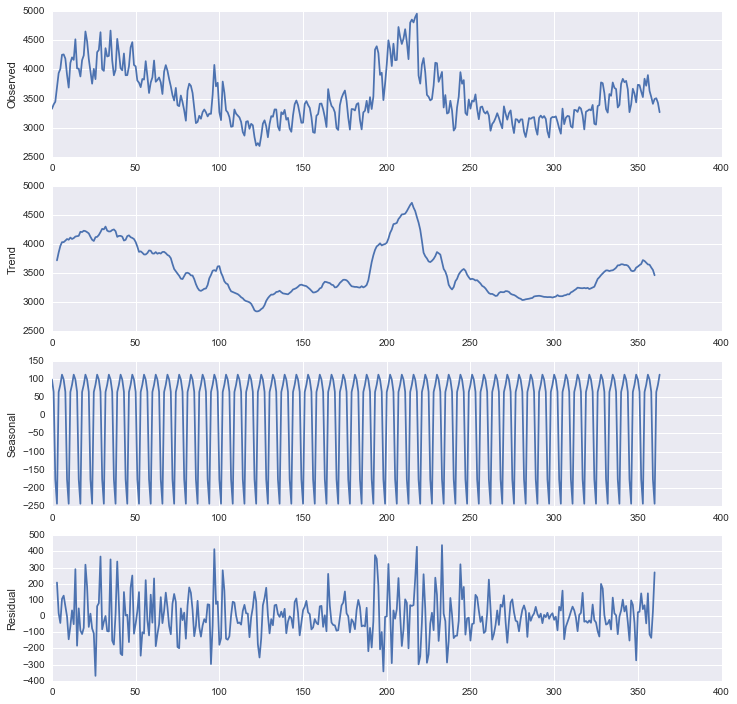

In [112]:
plt.figure(figsize=(12,12))

plt.subplot(4,1,1)
plt.ylabel("Observed")
plt.plot(ts.observed) # 観測値

plt.subplot(4,1,2)
plt.ylabel("Trend")
plt.plot(ts.trend) # トレンド成分

plt.subplot(4,1,3)
plt.ylabel("Seasonal")
plt.plot(ts.seasonal) # 季節成分

plt.subplot(4,1,4)
plt.ylabel("Residual")
plt.plot(ts.resid) # ノイズ成分

plt.show()